In [1]:
# Developing and implementing Random Forest model on the dataset

In [2]:
import pandas as pd

In [3]:
# Data import
df = pd.read_csv('Social_Network_Ads.csv')

In [4]:
df.shape

(400, 5)

In [6]:
# input 
x = df[['Age','EstimatedSalary']]

# output
y = df['Purchased']

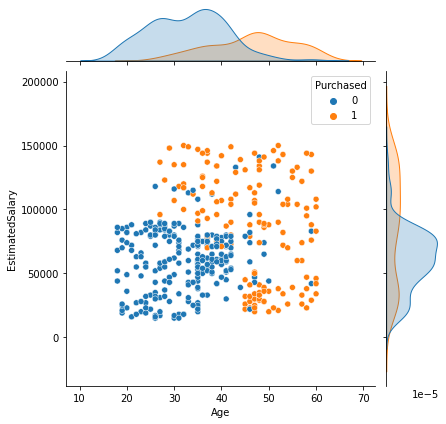

In [7]:
import seaborn as sns
sns.jointplot(x='Age', y='EstimatedSalary', hue='Purchased', data=df)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

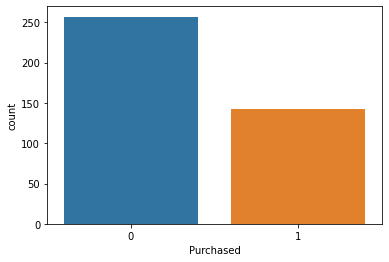

In [8]:
sns.countplot(x=y)

In [9]:
y.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [10]:
# Cross-validation
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state=0, test_size=0.25)

In [11]:
x_train.shape

(300, 2)

In [12]:
x_test.shape

(100, 2)

In [27]:
# Import the class
from sklearn.ensemble import RandomForestClassifier

In [44]:
# Create the object
classifier = RandomForestClassifier(random_state=0, n_estimators=10)

# n_estimators -> number of trees in the forest

In [45]:
# Train the algorithm with data
classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [46]:
# Predictions
y_pred = classifier.predict(x_test)

In [47]:
# Combine the data
result = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

In [48]:
result

,Actual,Predicted
132,0,0
309,0,0
341,0,0
196,0,0
246,0,0
...,...,...
146,1,0
135,0,0
390,1,1
264,1,1


In [49]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score

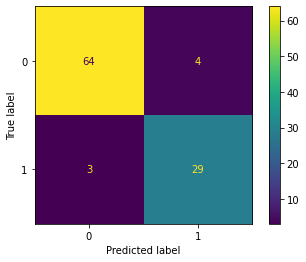

In [50]:
plot_confusion_matrix(classifier, x_test, y_test);

In [51]:
accuracy_score(y_test, y_pred)

0.93

In [52]:
# Single prediction
new1 = [[34, 123000]]
new2 = [[25, 48900]]

In [53]:
classifier.predict(new1)

array([1])

In [54]:
classifier.predict(new2)

array([0])

In [55]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [57]:
classifier.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=209652396)

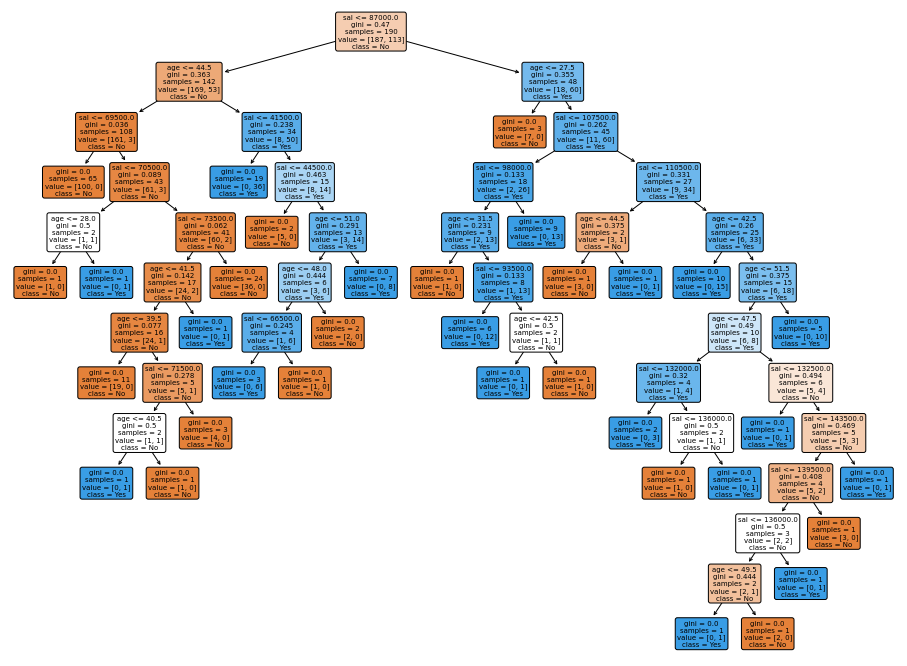

In [60]:
plt.figure(figsize=(16,12))
plot_tree(classifier.estimators_[8], fontsize=7, feature_names=['age','sal'],
         class_names=['No','Yes'], filled=True, rounded=True);

In [61]:
classifier.feature_importances_

array([0.48777687, 0.51222313])